In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy import exp

::: callout-tip
#### solve the following integral
$\int_{0}^{3} \frac{e^{x-1}}{2x+1} dx$

In [30]:
def fun(x):
    y = np.exp(x-1)/(2*x +1)
    return y

I_quad = quad(fun, 0, 3)
x = symbols('x')
I_int = integrate(exp(x-1)/(2*x +1), (x, 0, 3))
display(I_int)
print(f"result is {I_quad}")

exp(-1)*Integral(exp(x)/(2*x + 1), (x, 0, 3))

result is (1.5029081534735966, 7.638285955659027e-12)


::: callout-note
#### solve the following integral where one on the limits of integration is inf
#### show that the result is $\frac{\pi}{2}$
$\int_{0}^{\infty} \frac{1}{x^{2}+1} dx = \frac{\pi}{2}$

In [23]:
def fun(x):
    y = 1 /(x*x+1)
    return y
I = quad(fun,0, np.inf)
print(f"result is {I}")
display(Math(latex(I)))

result is (1.5707963267948966, 2.5777915205519274e-10)


<IPython.core.display.Math object>

##### Contour plot

Text(0.5, 0.5, ' yy values ')

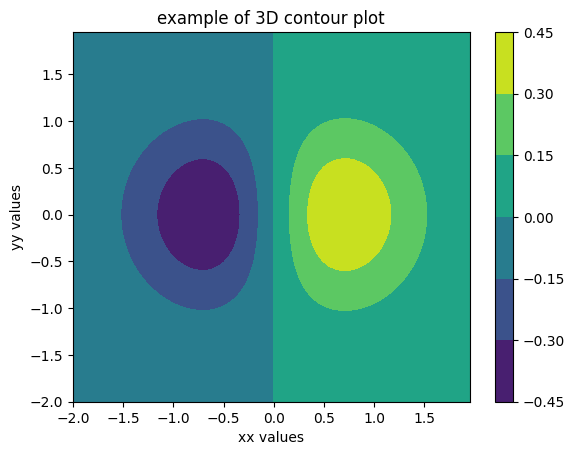

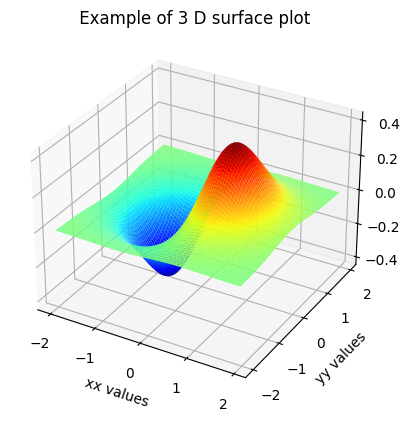

In [5]:
from numpy import arange, meshgrid
from scipy import exp

#generate high resolution x and y axis

x = arange(-2,2, .05)
y = arange(-2,2, .05)

#generate a xx*yy mesh
xx, yy = meshgrid(x,y)

#assign zz for each mesh point
zz= xx* np.exp(-xx**2 - yy**2)

#plot
from matplotlib.pyplot import contourf, colorbar, axes
fig = plt.figure(3)
contourf(xx,yy,zz)
colorbar()
plt.title('example of 3D contour plot')
plt.xlabel("xx values")
plt.ylabel("yy values")
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(4)
ax = plt.axes(projection='3d')
ax.plot_surface ( xx , yy , zz , cmap = plt . cm . jet ,
rstride =1 , cstride =1 , linewidth =0)
plt.title(' Example of 3 D surface plot ')
plt.xlabel(' xx values ')
plt.ylabel(' yy values ')

::: callout-note
### Example of Interpolation Methods


In [9]:
from numpy import array, poly1d, polyfit
from scipy.interpolate import interp1d

#OUr data
xdata = array([2,3,4,6,12,18,22,33,40,45,50,57])
ydata = array([4.5,10,16,37,120,100,83.9,65,64,66,70,71])
#value to interpolate
xv = 3.5
#linear interpolation
yv_lin = interp1d(xdata, ydata, kind='linear')(xv)
#pure polynomial interpolation
yv_poly = poly1d(polyfit(xdata, ydata, len(xdata)-1))(xv)
# Quadratic spline interpolation
yv_spline = interp1d(xdata, ydata, kind='quadratic')(xv)
# Cubic spline interpolation
yv_spline2 = interp1d(xdata, ydata, kind='cubic')(xv)
#plot
print(f"linear interpolation at {xv} is {yv_lin}")
print(f"pure polynomial interpolation at {xv} is {yv_poly}")
print(f"quadratic spline interpolation at {xv} is {yv_spline}")
print(f"cubic spline interpolation at {xv} is {yv_spline2}")


linear interpolation at 3.5 is 13.0
pure polynomial interpolation at 3.5 is 12.753519628997378
quadratic spline interpolation at 3.5 is 12.77262603312845
cubic spline interpolation at 3.5 is 12.7513549370562


In [8]:
xdata.shape, ydata.shape

((12,), (13,))

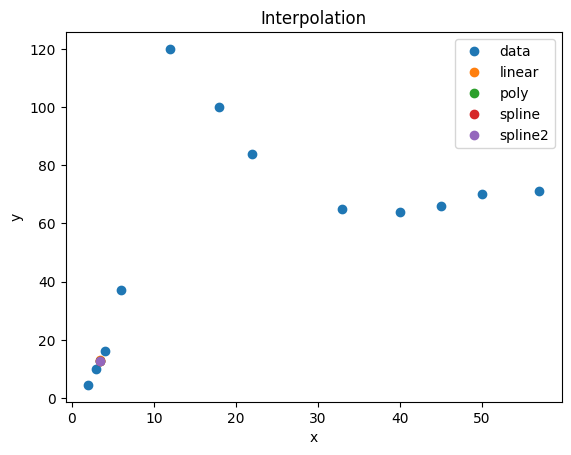

In [10]:
#plot all them
from matplotlib.pyplot import plot, legend, title, xlabel, ylabel
plot(xdata, ydata, 'o', label='data')
plot(xv, yv_lin, 'o', label='linear')
plot(xv, yv_poly, 'o', label='poly')
plot(xv, yv_spline, 'o', label='spline')
plot(xv, yv_spline2, 'o', label='spline2')
legend()
title('Interpolation')
xlabel('x')
ylabel('y')
plt.show()

::: callout-caution
### Least Squares method
* if m>n, the system is overdetermined
* if m<n, the system is underdetermined
* if m=n, the system is determined
* if m=n and A is nonsingular, the system is determined and consistent
* if m=n and A is singular, the system is determined and inconsistent
* if m<n, the solution exists and it is unique.
* if m>n, the solution may not exist.
* if m=n, the solution is pure interpolation and it is unique.


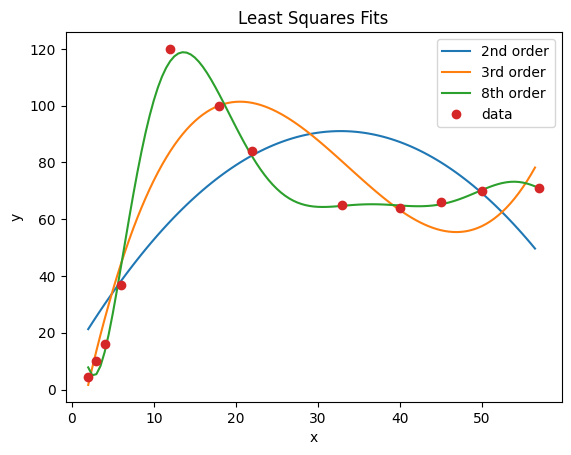

2nd order fit coefficients: [-0.07360873  4.82716693 11.90796101]
3rd order fit coefficients: [ 5.00971396e-03 -5.06567252e-01  1.44611593e+01 -2.53171296e+01]
8th order fit coefficients: [ 1.21242621e-09 -3.31174174e-07  3.75413629e-05 -2.27553315e-03
  7.89102201e-02 -1.54036561e+00  1.51737533e+01 -5.36623265e+01
  6.55567161e+01]


In [12]:
# my x data
xdata = array([2,3,4,6,12,18,22,33,40,45,50,57])
# my y data
ydata = array([4.5,10,16,37,120,100,83.9,65,64,66,70,71])
# calculate all LS fits
a2 = polyfit(xdata, ydata, 2)
a3 = polyfit(xdata, ydata, 3)
a8 = polyfit(xdata, ydata, 8)
#finer x range just for plotting
xvals = arange(2,57,0.5)
#calculate y values for each fit
yvals2 = poly1d(a2)(xvals)
yvals3 = poly1d(a3)(xvals)
yvals8 = poly1d(a8)(xvals)
#plot LS fits
plot(xvals, yvals2, label='2nd order')
plot(xvals, yvals3, label='3rd order')
plot(xvals, yvals8, label='8th order')
#plot data
plot(xdata, ydata, 'o', label='data')
legend()
title('Least Squares Fits')
xlabel('x')
ylabel('y')
plt.show()
#print results
print(f"2nd order fit coefficients: {a2}")
print(f"3rd order fit coefficients: {a3}")
print(f"8th order fit coefficients: {a8}")


::: callout-note
### Integration Methods

* solve the following integral to obtain the primitive of
* $\int (6x^{5} + \frac{log(x)}{x}) dx$

In [19]:
from sympy import *
x = symbols('x')
i= integrate(6*x**5 + log(x)/x, x)
print(f"result is {i}")
#display results i in math format
from IPython.display import display, Math
display(Math(latex(i)))


result is x**6 + log(x)**2/2


<IPython.core.display.Math object>

::: callout-note
### Symbolic Defined Integrals
$\int_{\pi/2}^{b} cos(x) + sin(x)dx + \int_{0}^{\infty} \frac{sin(x)}{\sqrt(x)}dx$

In [20]:
x = symbols('x')
b = symbols('b')
i2 = integrate(cos(x) + sin(x),(x, -np.pi/2,b))+ integrate(sin(x)/(x*0.5), (x, 0, np.inf))
print(f"result is {i2}")
#display the results in math format
from IPython.display import display, Math
display(Math(latex(i2)))
#display(Math(r'\int_0^{\infty} \frac{\sin(x)}{x} dx = %s' % latex(i2)))


result is sin(b) - cos(b) + 1.0 + 1.0*pi


<IPython.core.display.Math object>